In [2]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-trainval', dataroot='/home/erik/NAS/publicdatasets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 15.725 seconds.
Reverse indexing ...
Done reverse indexing in 3.0 seconds.


In [3]:
nusc.list_scenes()

scene-0161, Car overtaking, parking lot, peds, ped ... [18-05-21 15:07:23]   19s, boston-seaport, #anns:1970
scene-0162, Leaving parking lot, parked cars, hidde... [18-05-21 15:07:43]   19s, boston-seaport, #anns:2230
scene-0163, Drive along street with dozens of parke... [18-05-21 15:08:03]   19s, boston-seaport, #anns:1585
scene-0164, Turn into narrow street, parked cars, p... [18-05-21 15:08:38]   19s, boston-seaport, #anns:745
scene-0165, Pass crane, truck and construction work... [18-05-21 15:09:15]   19s, boston-seaport, #anns:1423
scene-0166, Leaving narrow street, many cars [18-05-21 15:09:35]   19s, boston-seaport, #anns:1313
scene-0167, Pass parked trucks, sitting pedestrians... [18-05-21 15:10:13]   19s, boston-seaport, #anns:1455
scene-0168, Parking lot, peds, parked cars, parked ... [18-05-21 15:10:52]   19s, boston-seaport, #anns:1751
scene-0170, Turn left, truck parked in the middle o... [18-05-21 15:13:37]   19s, boston-seaport, #anns:1430
scene-0171, Densely parked tru

In [4]:
scene_names = []
for i in range(850):
    if "ped" in nusc.scene[i]["description"].lower():
        scene_names.append(nusc.scene[i]["name"])
    else:
        pass
with open(r'/home/erik/NAS/publicdatasets/nuscenes/ped_scenes.txt', 'w') as fp:
    for item in scene_names:
        # write each item on a new line
        fp.write("%s\n" % item)

a04f96de77294bdfa756adf6cbb99130
{'token': 'a04f96de77294bdfa756adf6cbb99130', 'sample_token': 'ee43cd05608e4e9e9f741d38397c2131', 'instance_token': '8bc78981e44e4990bf32d91db70a9236', 'visibility_token': '2', 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'], 'translation': [2046.87, 996.298, 2.616], 'size': [2.759, 6.359, 4.545], 'rotation': [0.865933759475404, 0.0, 0.0, 0.5001586990154158], 'prev': '', 'next': 'a5dade05ba0a47109d72d195c5f6afc7', 'num_lidar_pts': 92, 'num_radar_pts': 6, 'category_name': 'vehicle.truck'}
dict_keys(['RADAR_FRONT', 'RADAR_FRONT_LEFT', 'RADAR_FRONT_RIGHT', 'RADAR_BACK_LEFT', 'RADAR_BACK_RIGHT', 'LIDAR_TOP', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_RIGHT', 'CAM_BACK', 'CAM_BACK_LEFT', 'CAM_FRONT_LEFT'])
Second annotation token:  a04f96de77294bdfa756adf6cbb99130
[label: nan, score: nan, xyz: [-3.75, -0.55, 22.61], wlh: [2.76, 6.36, 4.54], rot axis: [0.69, -0.51, 0.52], ang(degrees): 109.99, ang(rad): 1.92, vel: nan, nan, nan, name: vehicle.truck, t

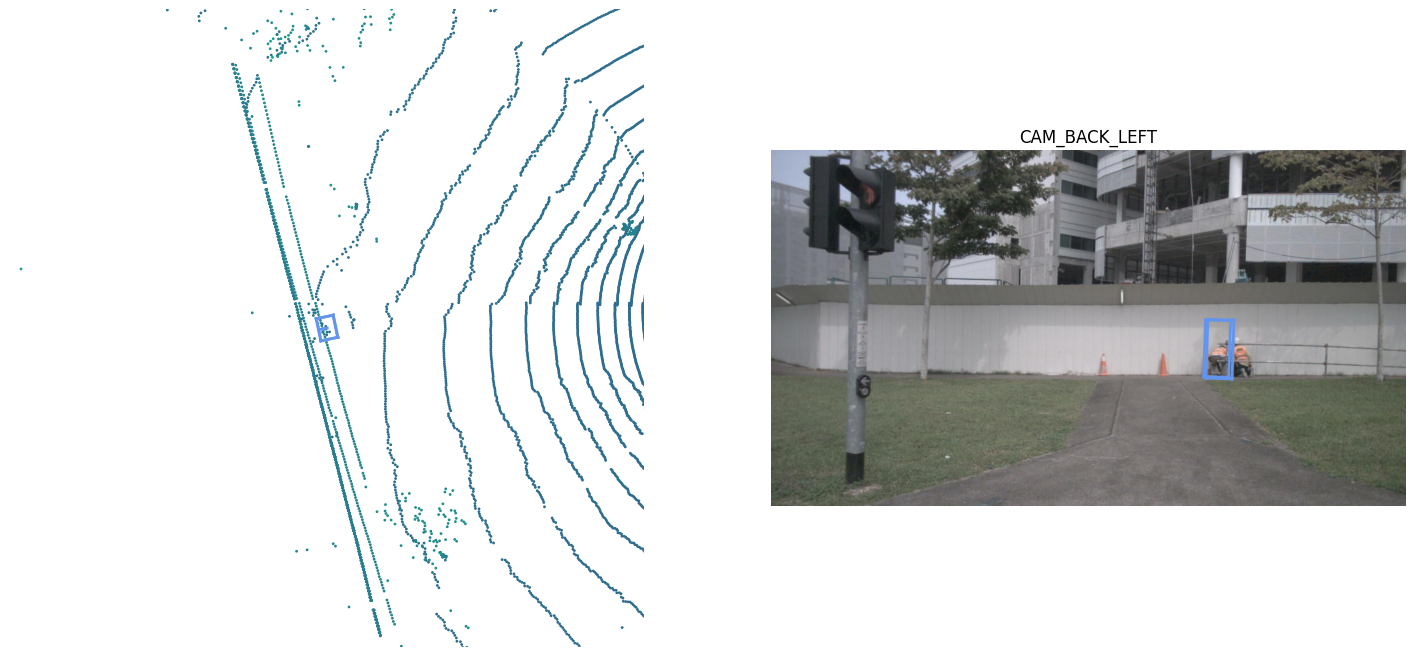

In [3]:
from nuscenes.utils.geometry_utils import view_points, box_in_image, BoxVisibility
import numpy as np
import cv2 as cv
from nuscenes.utils.data_classes import LidarPointCloud
test_scene = nusc.scene[70]
token = test_scene['first_sample_token']
sample = nusc.get('sample', token)
annotation_token = sample['anns'][5]
token = 'f64bfd3d4ddf46d7a366624605cb7e91'
nusc.render_annotation(token)
print(annotation_token)
annotation_data = nusc.get('sample_annotation', annotation_token)
print(annotation_data)
instance_token = annotation_data['instance_token']
ann_token = nusc.field2token('sample_annotation', 'instance_token', instance_token)
closest = [np.inf, None]

sample_record = nusc.get('sample', annotation_data['sample_token'])
print(sample_record['data'].keys())
print("Second annotation token: ", sample_record['anns'][5])
boxes, cam = [], []
cams = [key for key in sample_record['data'].keys() if 'CAM' in key]
for cam in cams:
            data_path, boxes, camera_intrinsic = nusc.get_sample_data(sample_record['data'][cam], box_vis_level=BoxVisibility.ALL,
                                                    selected_anntokens=[annotation_token])
            if len(boxes) > 0:
                break  # We found an image that matches. Let's abort.
print(boxes)

cam = sample_record['data'][cam]
data_path, boxes, camera_intrinsic = nusc.get_sample_data(cam, selected_anntokens=[annotation_token], box_vis_level=BoxVisibility.ALL)
img = cv.imread(data_path)
corners = view_points(boxes[0].corners(), camera_intrinsic, normalize=True)[:2, :]
i = 0
colors = ((0, 0, 255), (255, 0, 0), (155, 155, 155))
for i in range(4):
            cv.line(img,
                     (int(corners.T[i][0]), int(corners.T[i][1])),
                     (int(corners.T[i + 4][0]), int(corners.T[i + 4][1])),
                     colors[2][::-1], 2)
for i in range(8):
    cv.circle(img, (int(corners[0][i]), int(corners[1][i])), 10, (0, 255, 0), -1)
    cv.imshow("test", img)
    cv.waitKey(0)
    cv.destroyAllWindows()
#lidar = sample_record['data']['LIDAR_TOP']
#data_path, boxes, camera_intrinsic = nusc.get_sample_data(lidar, selected_anntokens=#[annotation_token])
#pc = LidarPointCloud.from_file(data_path)
#print(pc.points.shape)
for box in boxes:
    corners = view_points(box.corners(), camera_intrinsic, normalize=True)[:2, :]
    print(corners)
# for annotation in sample['anns']:
#             ann = nusc.get('sample_annotation', annotation)
#             print(ann)

In [5]:
print(cams)

['CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_RIGHT', 'CAM_BACK', 'CAM_BACK_LEFT', 'CAM_FRONT_LEFT']


In [9]:
counter = 0
for i in range(850):
    curr_scene = nusc.scene[i]
    token = curr_scene['first_sample_token']
    sample = nusc.get('sample', token)
    print("%d of %d scenes" %(i, len(nusc.scene)))
    found = False
    while True:
        for annotation in sample['anns']:
            ann = nusc.get('sample_annotation', annotation)
            if 'human' in ann['category_name'].lower() or 'vehicle.bicycle' in ann['category_name'].lower():
                with open(r'/home/erik/NAS/publicdatasets/nuscenes/ped_bicycle_scenes_thorough.txt', 'a') as fp:
                    fp.write("%s\n" % curr_scene['name'])
                found = True
                break
        if found:
            counter += 1
            break
        if sample['next'] == '':
            break
        else:
            sample = nusc.get('sample', sample['next'])
print(counter)
        



0 of 850 scenes
1 of 850 scenes
2 of 850 scenes
3 of 850 scenes
4 of 850 scenes
5 of 850 scenes
6 of 850 scenes
7 of 850 scenes
8 of 850 scenes
9 of 850 scenes
10 of 850 scenes
11 of 850 scenes
12 of 850 scenes
13 of 850 scenes
14 of 850 scenes
15 of 850 scenes
16 of 850 scenes
17 of 850 scenes
18 of 850 scenes
19 of 850 scenes
20 of 850 scenes
21 of 850 scenes
22 of 850 scenes
23 of 850 scenes
24 of 850 scenes
25 of 850 scenes
26 of 850 scenes
27 of 850 scenes
28 of 850 scenes
29 of 850 scenes
30 of 850 scenes
31 of 850 scenes
32 of 850 scenes
33 of 850 scenes
34 of 850 scenes
35 of 850 scenes
36 of 850 scenes
37 of 850 scenes
38 of 850 scenes
39 of 850 scenes
40 of 850 scenes
41 of 850 scenes
42 of 850 scenes
43 of 850 scenes
44 of 850 scenes
45 of 850 scenes
46 of 850 scenes
47 of 850 scenes
48 of 850 scenes
49 of 850 scenes
50 of 850 scenes
51 of 850 scenes
52 of 850 scenes
53 of 850 scenes
54 of 850 scenes
55 of 850 scenes
56 of 850 scenes
57 of 850 scenes
58 of 850 scenes
59 of 8

In [10]:
counter = 0
for i in range(850):
    curr_scene = nusc.scene[i]
    token = curr_scene['first_sample_token']
    sample = nusc.get('sample', token)
    print("%d of %d scenes" %(i, len(nusc.scene)))
    found = False
    while True:
        for annotation in sample['anns']:
            ann = nusc.get('sample_annotation', annotation)
            if 'human' in ann['category_name'].lower():
                with open(r'/home/erik/NAS/publicdatasets/nuscenes/ped_scenes_thorough.txt', 'a') as fp:
                    fp.write("%s\n" % curr_scene['name'])
                found = True
                break
        if found:
            counter += 1
            break
        if sample['next'] == '':
            break
        else:
            sample = nusc.get('sample', sample['next'])
print(counter)

0 of 850 scenes
1 of 850 scenes
2 of 850 scenes
3 of 850 scenes
4 of 850 scenes
5 of 850 scenes
6 of 850 scenes
7 of 850 scenes
8 of 850 scenes
9 of 850 scenes
10 of 850 scenes
11 of 850 scenes
12 of 850 scenes
13 of 850 scenes
14 of 850 scenes
15 of 850 scenes
16 of 850 scenes
17 of 850 scenes
18 of 850 scenes
19 of 850 scenes
20 of 850 scenes
21 of 850 scenes
22 of 850 scenes
23 of 850 scenes
24 of 850 scenes
25 of 850 scenes
26 of 850 scenes
27 of 850 scenes
28 of 850 scenes
29 of 850 scenes
30 of 850 scenes
31 of 850 scenes
32 of 850 scenes
33 of 850 scenes
34 of 850 scenes
35 of 850 scenes
36 of 850 scenes
37 of 850 scenes
38 of 850 scenes
39 of 850 scenes
40 of 850 scenes
41 of 850 scenes
42 of 850 scenes
43 of 850 scenes
44 of 850 scenes
45 of 850 scenes
46 of 850 scenes
47 of 850 scenes
48 of 850 scenes
49 of 850 scenes
50 of 850 scenes
51 of 850 scenes
52 of 850 scenes
53 of 850 scenes
54 of 850 scenes
55 of 850 scenes
56 of 850 scenes
57 of 850 scenes
58 of 850 scenes
59 of 8

In [7]:
import pickle
with (open("/home/erik/ssd2/datasets/waymo_pose/3D_2D/30779396576054160_1880_000_1900_000_labels.pkl", "rb")) as openfile:
    labels = pickle.load(openfile)
print(len(labels['1552440196562294_2.0_ca9be338-79bb-4908-b4ee-5607a21b5b41']['keypoints_2d']))



KeyError: '1552440196562294_2.0_ca9be338-79bb-4908-b4ee-5607a21b5b41'

In [37]:
import dill
import sys
sys.path.append('/home/erik/ScePT/ScePT')
from ScePT.environment import Environment, EnvironmentMetadata
with open('/home/erik/ScePT/experiments/processed/nuScenes_train.pkl', "rb") as f:
    data = dill.load(f)
f.close()
print(data)

In [3]:
import numpy as np
import cv2 as cv
test = np.load('/home/erik/ssd2/datasets/nuscenes_pose/0_0a0bb68f73ec4206bea19224144acb39img.npy')
cv.imshow("test", test)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
import numpy as np
import cv2 as cv
img = np.load('/home/erik/ssd2/datasets/nuscenes_pose/9_fa8a976e07cc49648b6ec6a4d7390ffcimg.npy')
cv.imshow("test", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
import dill
import sys
import numpy as np
sys.path.append('/home/erik/ScePT/ScePT')
processed_train_file = 'processed_poses_gt_nuScenes_train.pkl'
with open(processed_train_file, "rb") as f:
    train_cliques = dill.load(f)
print(len(train_cliques))
indices = []
for i, clique in enumerate(train_cliques):
    if 'PEDESTRIAN' in clique[0]:
        indices.append(i)
print(len(indices))
print(len(train_cliques[indices[0]][0]))
print(train_cliques[indices[0]][-2][0].shape)

cliques_with_poses = []
for index in indices:
    for pose in train_cliques[index][-2]:
        if pose is None:
            continue
        else:
            if not np.all(pose == pose[0,0,0]):
                cliques_with_poses.append(index)
                break
print(len(cliques_with_poses))
print(len(train_cliques[0][1]))
print(len(train_cliques[0][0]))

55494
27989
1
(8, 13, 3)
19114
4
4
